In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandango = pd.read_csv('./fandango_scrape.csv')

In [4]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


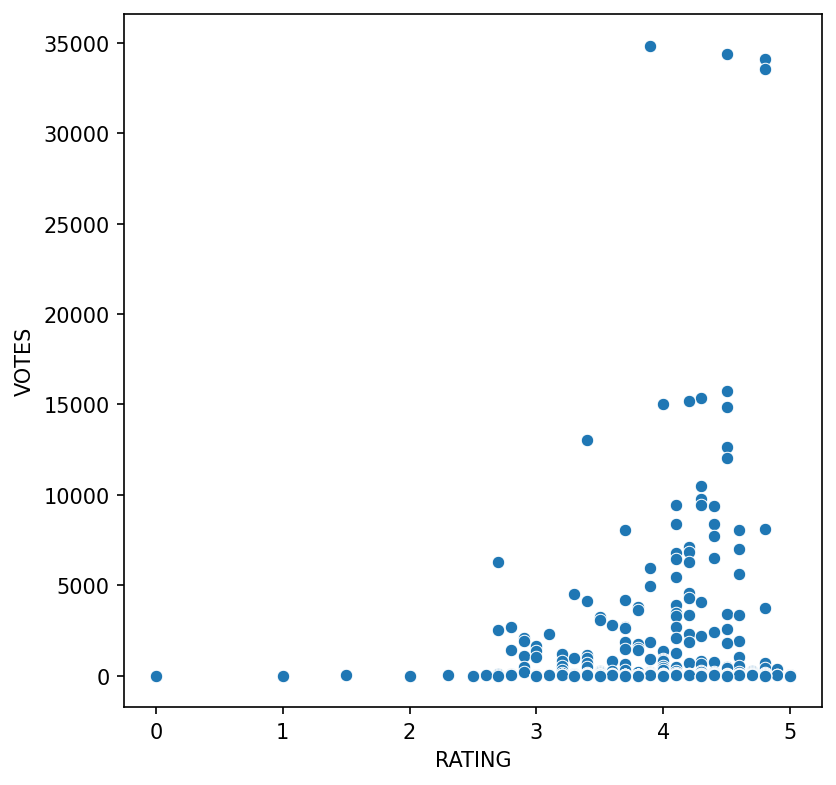

In [7]:
plt.figure(figsize=(6,6), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.show()

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
def spl(s):
    x = s.split(' ')
    return x[-1]

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(spl)

In [11]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)


In [12]:
fandango['YEAR'] = fandango['YEAR'].str.slice(start=1, stop=5)

In [13]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [14]:
fandango['MOVIES_PER_YEAR'] = fandango['YEAR'].value_counts()

In [15]:
fandango = fandango.drop('MOVIES_PER_YEAR', axis=1)

In [16]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


<Figure size 1500x900 with 0 Axes>

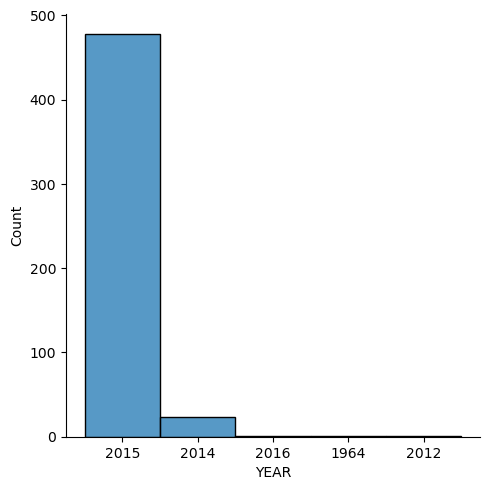

In [28]:
plt.figure(figsize=(10,6), dpi=150)
sns.displot(data=fandango, x='YEAR')
plt.show()

In [37]:
fandango.sort_values(ascending=False, by='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
463,La leon (2015),0.0,0.0,0,2015
464,La passion d'Augustine (2015),0.0,0.0,0,2015
465,Le gaucher (2015),0.0,0.0,0,2015
466,Le monde de demain (2015),0.0,0.0,0,2015


In [33]:
(fandango['VOTES'] == 0).value_counts()

False    435
True      69
Name: VOTES, dtype: int64

In [45]:
fandango2 = fandango.loc[(fandango['VOTES'] != 0)]

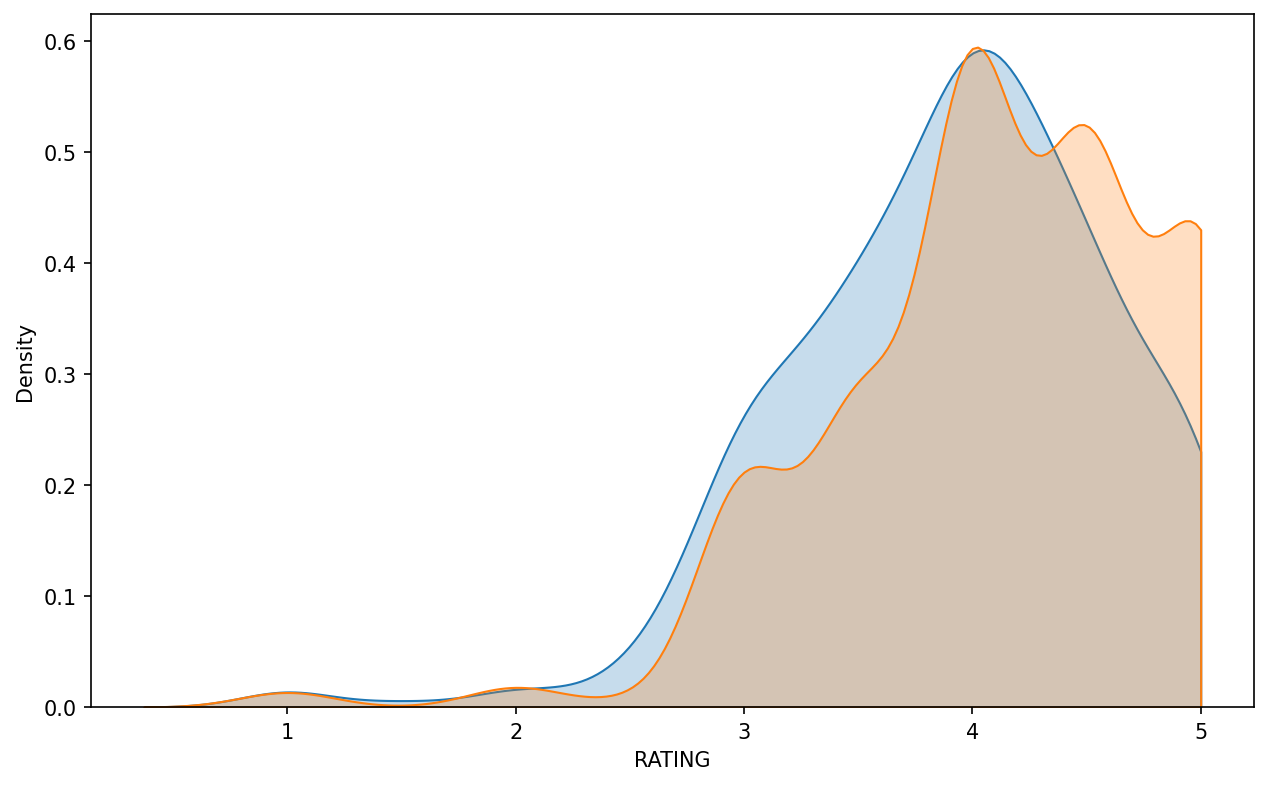

In [58]:
plt.figure(figsize=(10,6), dpi=150)
sns.kdeplot(data=fandango2, x='RATING', shade=True, clip=(0,5))
sns.kdeplot(data=fandango2, x='STARS', shade=True, clip=(0,5))

plt.show()

In [61]:
fandango2['STARS_DIFF'] = fandango['STARS']-fandango['RATING']

C:\Users\user\AppData\Local\Temp\ipykernel_3940\434756459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango2['STARS_DIFF'] = fandango['STARS']-fandango['RATING']


In [62]:
fandango2.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


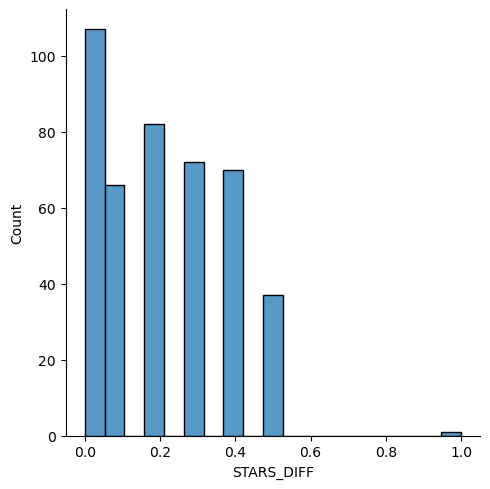

In [66]:
sns.displot(data=fandango2, x='STARS_DIFF', palette='set2')